In [35]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [36]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [37]:
print(len(df))
df.tail()

144


,Month,AirPassengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [38]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [39]:
df[df.columns[0]] = pd.DatetimeIndex(df[df.columns[0]])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [40]:
df = df.rename(columns={df.columns[0]:'ds',
                       df.columns[1]:'y'})

In [41]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [34]:
#prophet imposes the strict condition that the input columns be named ds(the time column)
#and y(the metric column), so let's rename them accordingly.

#df = df.rename(columns={'Month': 'ds',
#                       'AirPassengers': 'y'})

#df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


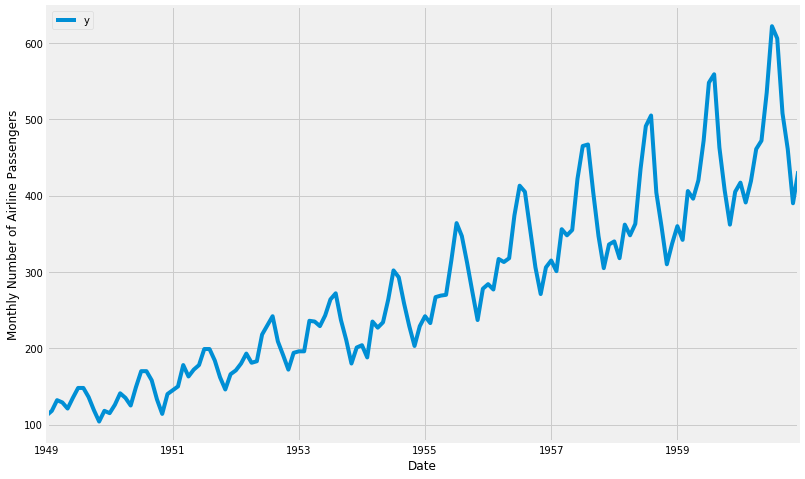

In [11]:
#visualization
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [12]:
#prophet library modeling
my_model = Prophet(interval_width=0.95) #uncertainty interval - default = 80%

In [13]:
my_model.fit(df)

/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions. Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the make_future_dataframe helper function:

In [65]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')

#new_dates = future_dates.tail(36)
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [67]:
future_dates.dtypes

ds    datetime64[ns]
dtype: object

When working with Prophet, it is important to consider the frequency of our time series. Because we are working with monthly data, we clearly specified the desired frequency of the timestamps (in this case, MS is the start of the month). Therefore, the make_future_dataframe generated 36 monthly timestamps for us. In other words, we are looking to predict future values of our time series 3 years into the future.

In [68]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [71]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.787427,602.854988,691.847140
176,1963-09-01,602.260711,561.903275,646.919124
177,1963-10-01,566.233600,521.555163,609.206197
178,1963-11-01,534.258296,490.699941,576.173079
179,1963-12-01,563.846779,521.574191,608.524849


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

ds: the datestamp of the forecasted value
yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
yhat_lower: the lower bound of our forecasts
yhat_upper: the upper bound of our forecasts

A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

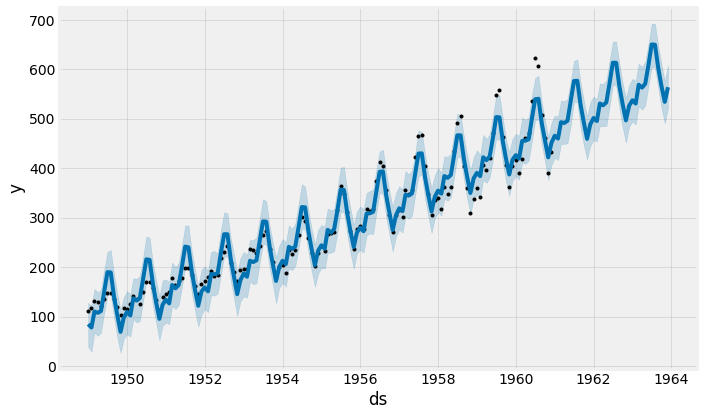

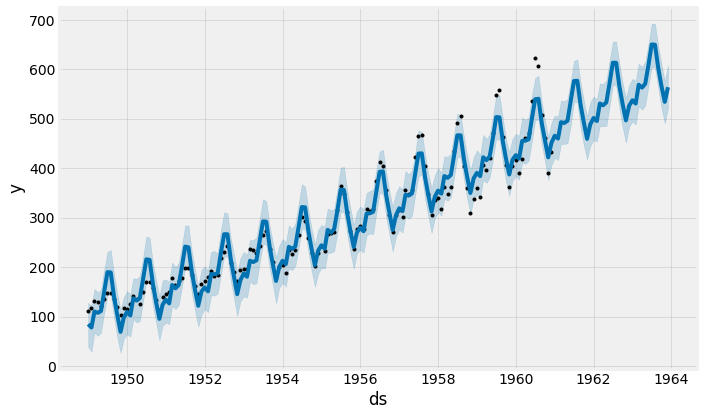

In [74]:
my_model.plot(forecast)

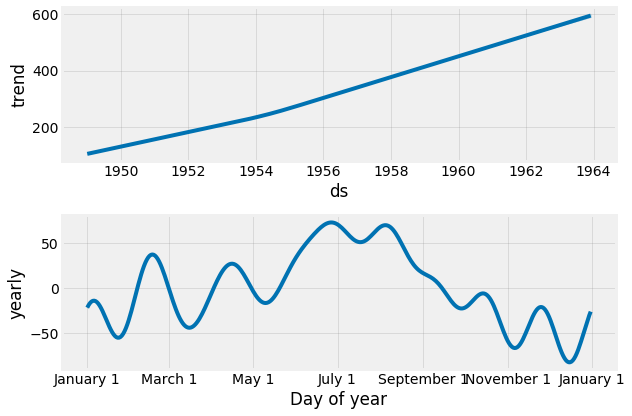

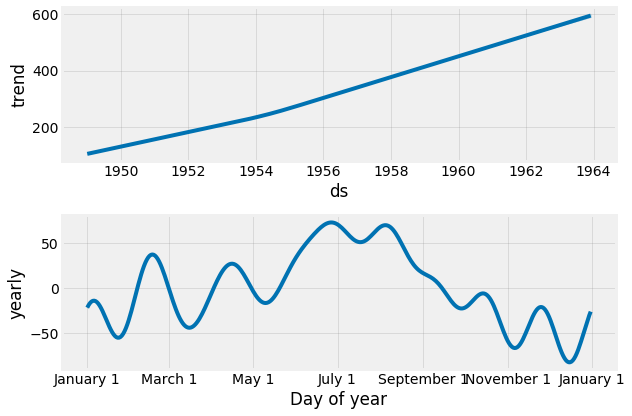

In [75]:
my_model.plot_components(forecast)